In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
%matplotlib inline

### PWR 900 scaling results

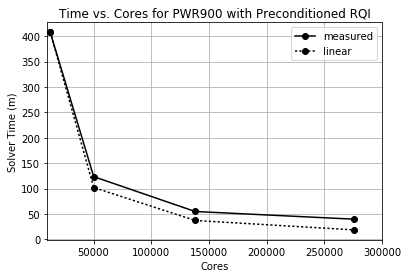

In [17]:
pwr_cores = [12544, 50176, 137984, 275968]
pwr_time = [407.8, 123.4, 54.8, 39.6]
tperfect = [407.8, 102.0, 37.1, 18.5]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(pwr_cores, pwr_time, 'ko-')
ax.plot(pwr_cores, tperfect, 'ko:')
leg = ax.legend(("measured", "linear"), loc="upper right")
ax.grid(True)
ax.set_xlabel("Cores")
ax.set_ylabel("Solver Time (m)")
ax.set_title("Time vs. Cores for PWR900 with Preconditioned RQI")
ax.set_xlim([10000, 300000])
#ax.set_xticks([40000, 80000, 120000, 160000, 200000])
show()

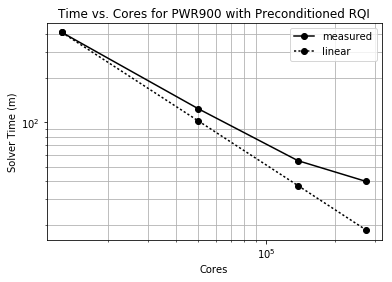

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.loglog(pwr_cores, pwr_time, 'ko-')
ax.loglog(pwr_cores, tperfect, 'ko:')
leg = ax.legend(("measured", "linear"), loc="upper right")
ax.grid(True, which='minor')
ax.set_xlabel("Cores")
ax.set_ylabel("Solver Time (m)")
ax.set_title("Time vs. Cores for PWR900 with Preconditioned RQI")
#ax.set_xlim([10000, 300000])
#ax.set_xticks([40000, 80000, 120000, 160000, 200000])
fig.savefig('pwr.png')

### BW1484 of some sort

In [20]:
### Time in Hours ### 
arnoldi_part = np.array([3.06, 1.90, 1.84])
arnoldi_full = np.array([7.99, 4.04, 2.34])
rqi_nop = np.array([5.56, 2.86, 1.63])
rqi_precon = np.array([4.71, 2.46, 1.55])
bw_small_cores = np.array([128, 256, 512])

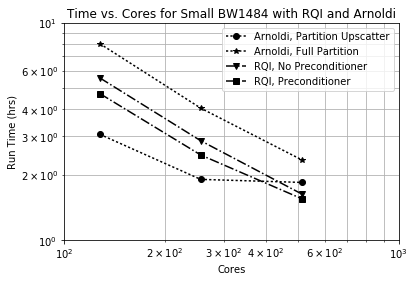

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.loglog(bw_small_cores, arnoldi_part, 'ko:', label="Arnoldi, Partition Upscatter")
ax.loglog(bw_small_cores, arnoldi_full, 'k*:', label="Arnoldi, Full Partition")
ax.loglog(bw_small_cores, rqi_nop, 'kv-.', label="RQI, No Preconditioner")
ax.loglog(bw_small_cores, rqi_precon,'ks-.', label="RQI, Preconditioner")
ax.set_xlabel("Cores")
ax.set_ylabel("Run Time (hrs)")
leg = ax.legend(loc="upper right")
ax.grid(True, which='minor')
ax.set_xlim([1e2, 1e3])
ax.set_ylim([1, 10])
ax.set_title("Time vs. Cores for Small BW1484 with RQI and Arnoldi")
fig.savefig('bw-small.png')

In [22]:
# Print Slopes
print("Slopes: ")
slope, intercept = np.polyfit(np.log(bw_small_cores), np.log(arnoldi_part), 1)
print("Arnoldi, Partition Upscatter: ")
print(slope)
slope, intercept = np.polyfit(np.log(bw_small_cores), np.log(arnoldi_full), 1)
print("Arnoldi, Full Partition: ")
print(slope)
slope, intercept = np.polyfit(np.log(bw_small_cores), np.log(rqi_nop), 1)
print("RQI, No Preconditioner: ")
print(slope)
slope, intercept = np.polyfit(np.log(bw_small_cores), np.log(rqi_precon), 1)
print("RQI, Preconditioner")
print(slope)

Slopes: 
Arnoldi, Partition Upscatter: 
-0.366912943318
Arnoldi, Full Partition: 
-0.885843486672
RQI, No Preconditioner: 
-0.885106459246
RQI, Preconditioner
-0.801729422169


### Larger Problem: 336x336x154 cells, 11 k-blocks, starting with 3136 cores. 

In [23]:
arnoldi_large_part = np.array([18291, 9425.1, 7295.2, 5075.8]) # Time in seconds
arnoldi_large_full = np.array([39375, 16669, 9045.8, 4994.3])
rqi_large_nop = np.array([30077, 13238, 6925.1, 3933.2])
rqi_large_precon = np.array([25338, 10871, 5884.9,  3556.2 ])
bw_large_cores = np.array([3136, 6272, 12544, 25088])

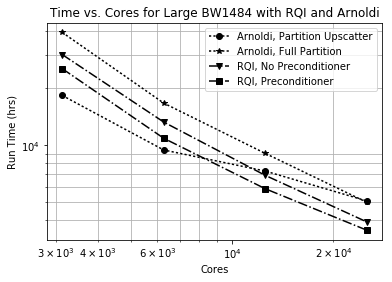

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.loglog(bw_large_cores, arnoldi_large_part, 'ko:', label="Arnoldi, Partition Upscatter")
ax.loglog(bw_large_cores, arnoldi_large_full, 'k*:', label="Arnoldi, Full Partition")
ax.loglog(bw_large_cores, rqi_large_nop, 'kv-.', label="RQI, No Preconditioner")
ax.loglog(bw_large_cores, rqi_large_precon,'ks-.', label="RQI, Preconditioner")
ax.set_xlabel("Cores")
ax.set_ylabel("Run Time (hrs)")
leg = ax.legend(loc="upper right")
ax.grid(True, which='minor')
#ax.set_xlim([1e3, 3e4])
#ax.set_ylim([1e3, 1e5])
ax.set_title("Time vs. Cores for Large BW1484 with RQI and Arnoldi")
fig.savefig('bw-large.png')